In [1]:

# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


In [2]:

# get the stock market data of a compressor of a train from a .csv-file:
df01 = pd.read_csv("MetroPT3_AirCompressor.csv")


In [3]:

df01


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:

#Attribute Information:
#The dataset consists of 15169480 data points collected at 1Hz from February to August 2020 and is described by 15 features from 7 analogue (1-7) and 8 digital (8-15) sensors:

#analog:
#2. TP2 (bar) – the measure of the pressure on the compressor.
#3. TP3 (bar) – the measure of the pressure generated at the pneumatic panel.
#4. H1 (bar) – the measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.
#5. DV pressure (bar) – the measure of the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.
#6. Reservoirs (bar) – the measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).
#7. Motor Current (A) – the measure of the current of one phase of the three-phase motor; it presents values close to 0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts working.
#8. Oil Temperature (ºC) – the measure of the oil temperature on the compressor.

#digital:
#9.  COMP - the electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.
#10. DV electric – the electrical signal that controls the compressor outlet valve; it is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.
#11. TOWERS – the electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air; when not active, it indicates that tower one is functioning; when active, it indicates that tower two is in operation.
#12. MPG – the electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behaviour as the MPG sensor.
#13. LPS – the electrical signal that detects and activates when the pressure drops below 7 bars.
#14. Pressure Switch - the electrical signal that detects the discharge in the air-drying towers.
#15. Oil Level – the electrical signal that detects the oil level on the compressor; it is active when the oil is below the expected values.
#16. Caudal Impulse – the electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.


In [5]:

# no null-values to control:
df01.isnull().sum()


Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [6]:

# check duplicates:
df01["timestamp"].value_counts().head(10)


timestamp
2020-02-01 00:00:00    1
2020-06-21 16:32:20    1
2020-06-21 16:33:50    1
2020-06-21 16:33:40    1
2020-06-21 16:33:30    1
2020-06-21 16:33:20    1
2020-06-21 16:33:10    1
2020-06-21 16:33:00    1
2020-06-21 16:32:50    1
2020-06-21 16:32:40    1
Name: count, dtype: int64

In [7]:

df01.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [8]:

# convert to an date-format (2020-06-21 16:32:20):
df01["timestamp"] = pd.to_datetime(df01["timestamp"],format='%Y-%m-%d %H:%M:%S')


In [9]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

In [10]:

df01.describe()


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1516948,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,2020-05-16 22:58:36.631517184,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
min,0.000000e+00,2020-02-01 00:00:00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,2020-03-23 05:05:04.500000,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,2020-05-17 08:07:06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,2020-07-10 03:07:27.500000,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,2020-09-01 03:59:50,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,4.379053e+06,NaN,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01


In [11]:
df01.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [12]:

#the failure information is unlabeled:
#1 04/18/2020 00:00 04/18/2020 23:59 _Air leak_ High stress
#2 05/29/2020 23:30 05/30/2020 06:00 _Air Leak_ High stress Maintenance on 30Apr at 12:00
#3 06/05/2020 10:00 06/07/2020 14:30 _Air Leak_ High stress Maintenance on 08Jun at 16:00
#4 07/15/2020 14:30 07/15/2020 19:00 _Air Leak_ High stress Maintenance on 16Jul at 00:00


In [13]:

# create a label 'Air_Leak'
# failure dates
Air_Leak_dates = [('2020-04-18 00:00:00','2020-04-18 23:59:00'),('2020-05-29 23:30:00','2020-05-30 06:00:00'),
                  ('2020-06-05 10:00:00','2020-06-07 14:30:00'),('2020-07-15 14:30:00','2020-07-15 19:00:00')]
# new feature '0' --> ok, '1' --> failure:
df01['Air_Leak'] = 0
for start,end in Air_Leak_dates:
    df01.loc[(df01['timestamp'] >= start) & (df01['timestamp'] <= end),'Air_Leak'] = 1


In [14]:

# create a label 'Air_Leak_Maint'
# maintenance dates
Air_Leak_Maint_dates = [('2020-04-30 12:00:00','2020-04-30 12:01:00'),('2020-06-08 16:00:00','2020-06-08 16:01:00'),
                        ('2020-07-16 00:00:00','2020-07-16 00:01:00')]
# new feature '0' --> nothing, '1' --> maintenance:
df01['Air_Leak_Maint'] = 0
for start,end in Air_Leak_Maint_dates:
    df01.loc[(df01['timestamp'] >= start) & (df01['timestamp'] <= end),'Air_Leak_Maint'] = 1


In [15]:
df01[['Air_Leak','Air_Leak_Maint']].value_counts()

Air_Leak  Air_Leak_Maint
0         0                 1486981
1         0                   29954
0         1                      13
Name: count, dtype: int64

In [16]:
df01.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'Air_Leak', 'Air_Leak_Maint'],
      dtype='object')

In [17]:
df01.iloc[:,1:].select_dtypes(include=['float64','int64']).columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'Air_Leak',
       'Air_Leak_Maint'],
      dtype='object')

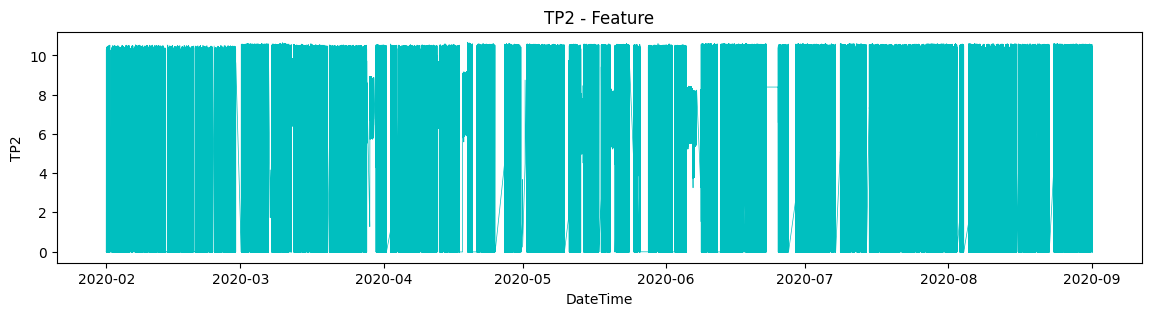

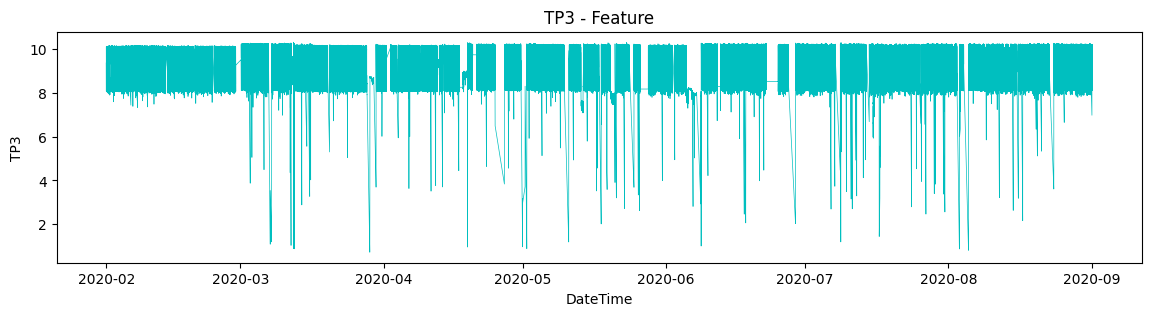

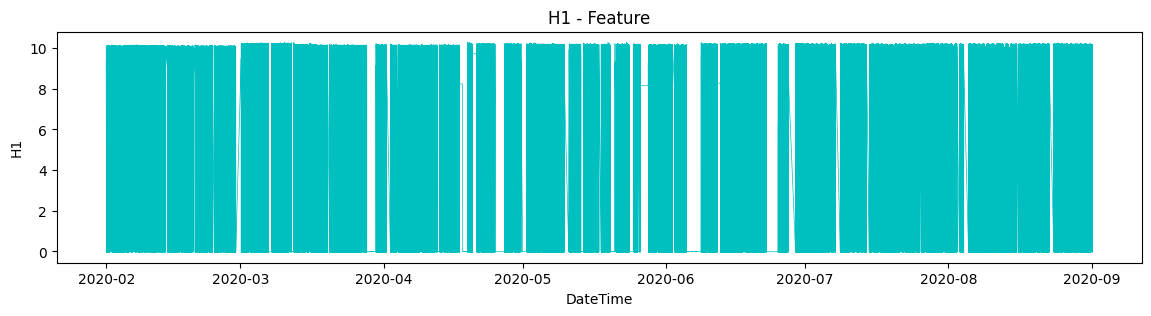

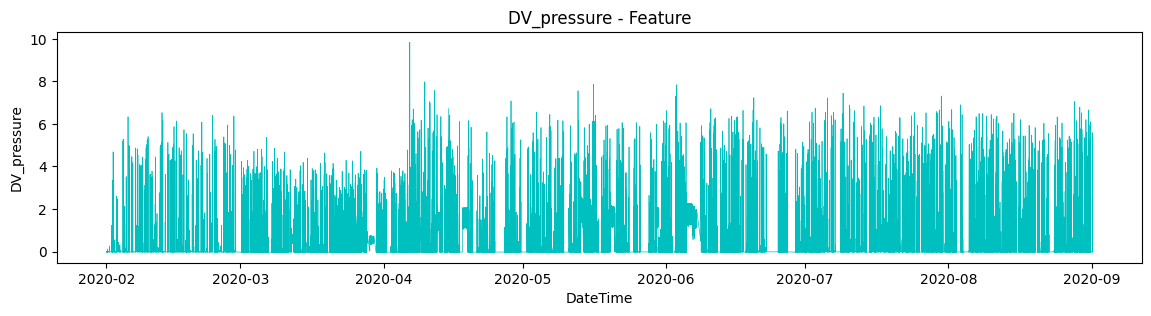

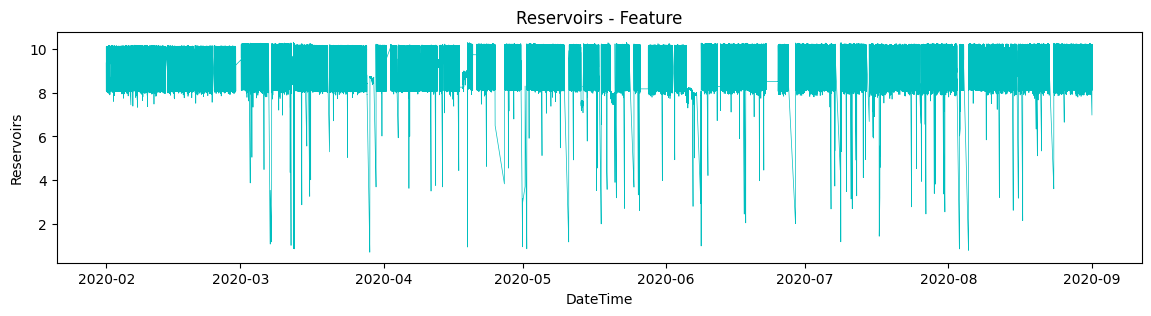

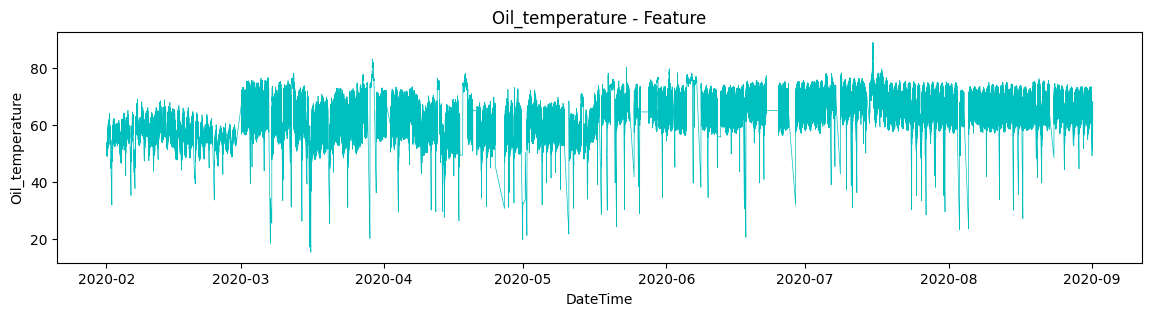

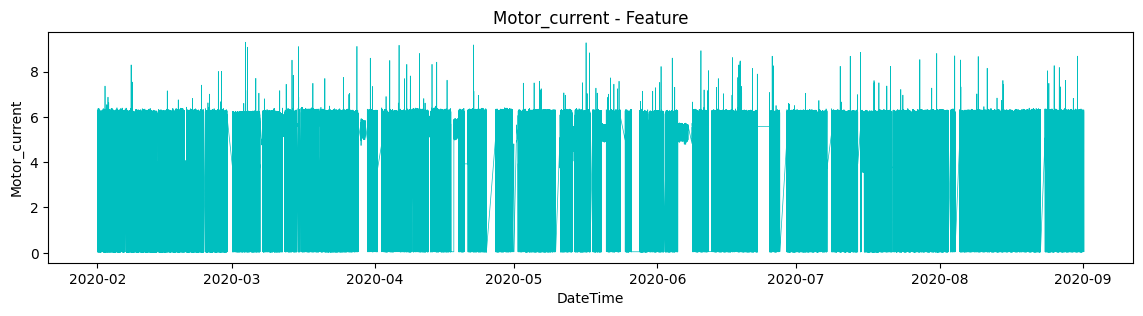

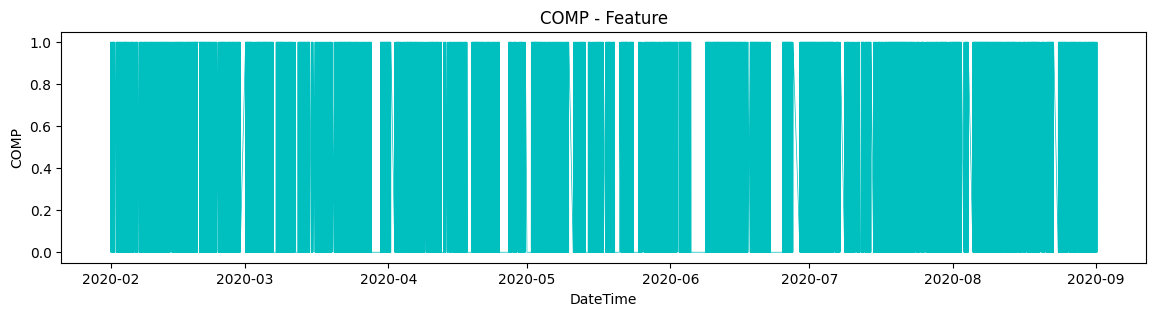

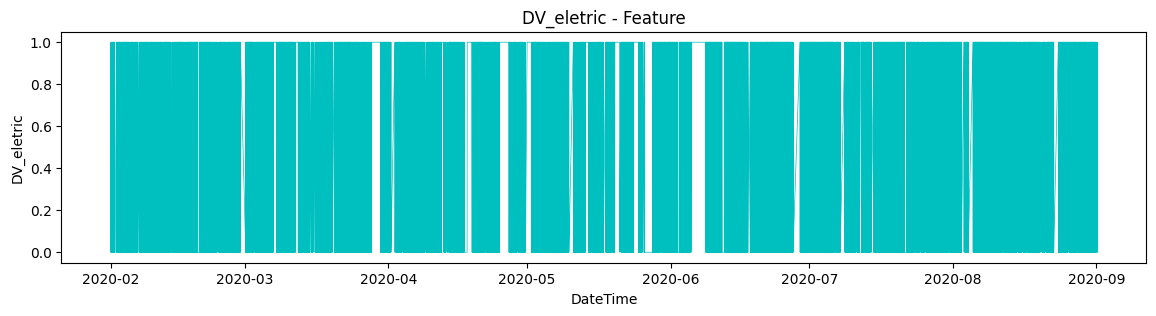

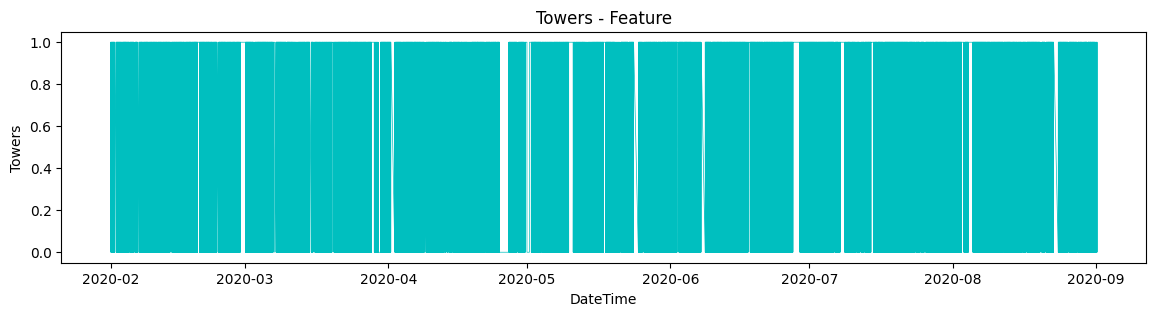

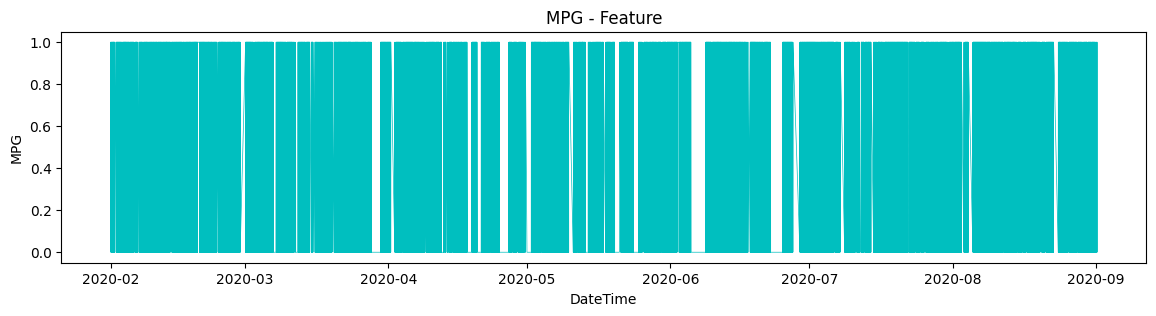

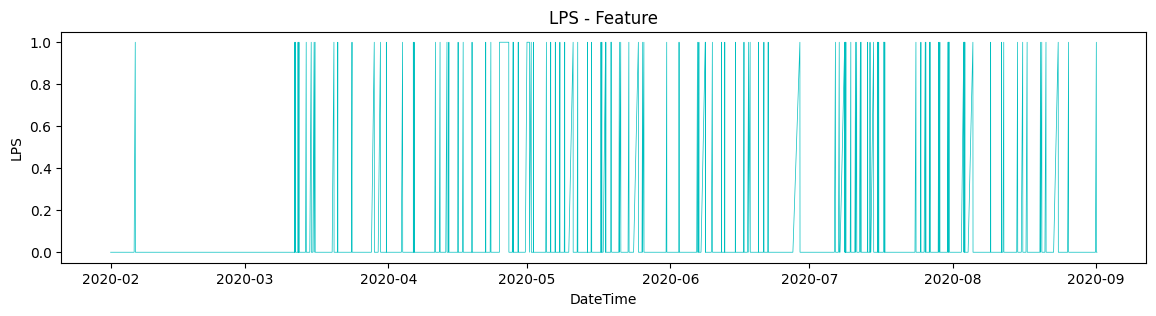

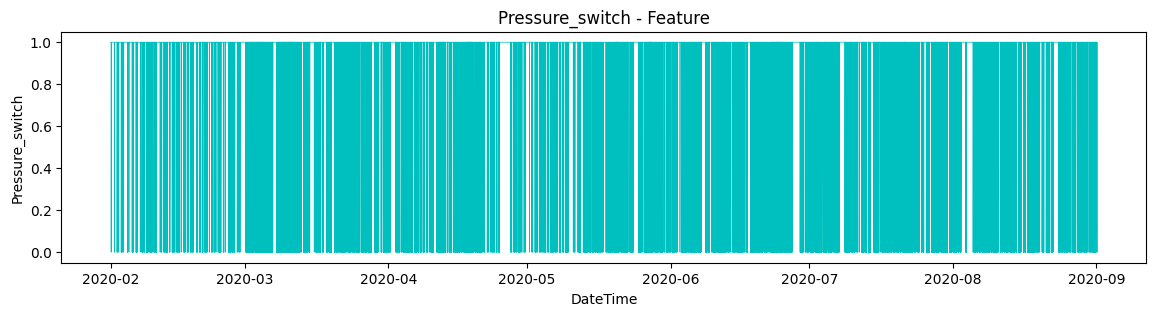

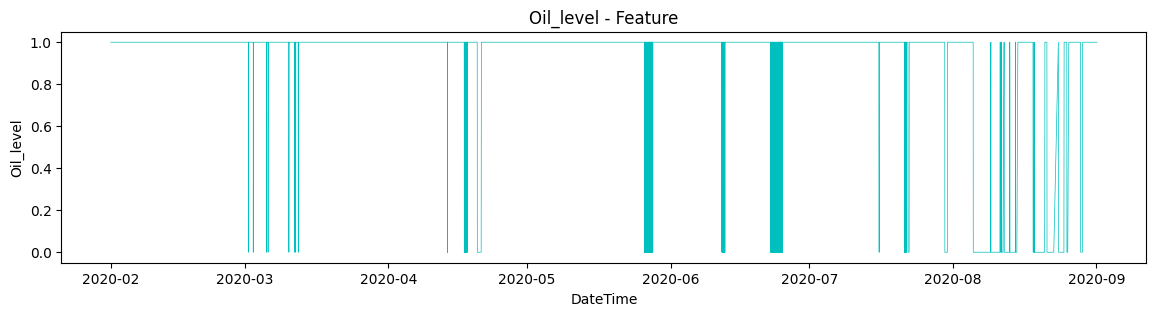

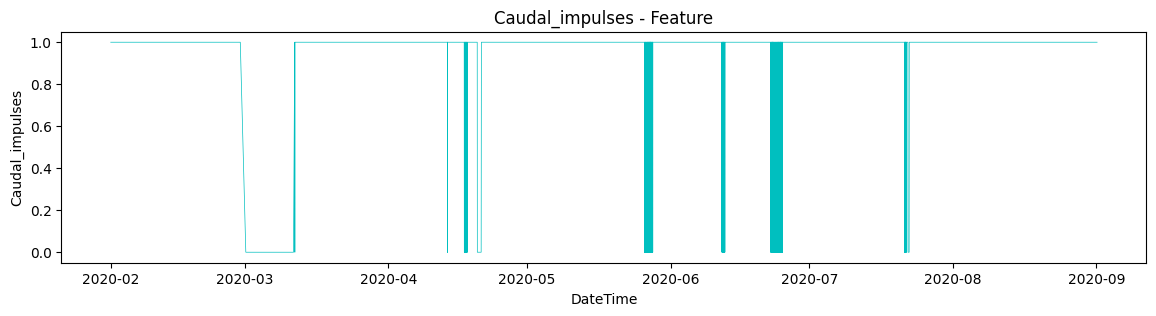

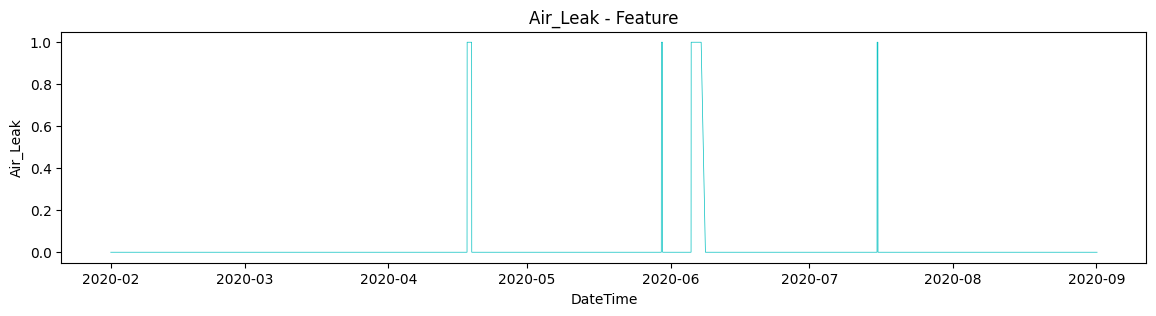

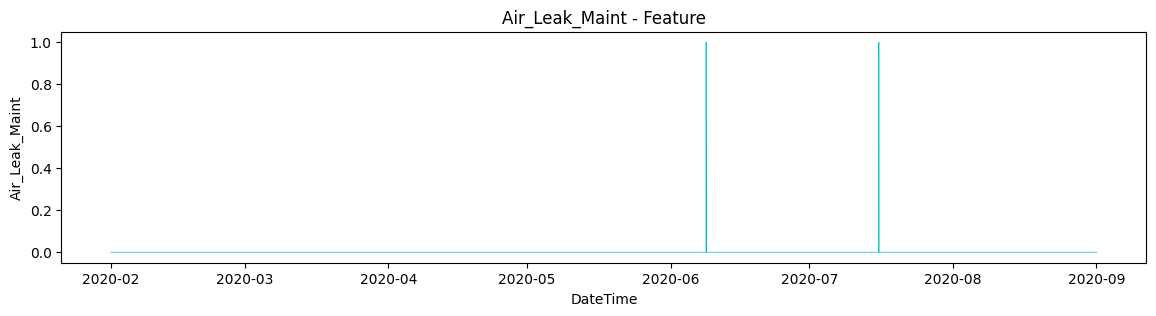

In [18]:

# visualizations of all features:
for c in df01[df01.columns[range(2,19)]]:
    plt.figure(figsize=(14,3))
    plt.title(f"{c} - Feature" )
    plt.plot(df01['timestamp'],df01[c],color='c',linewidth=0.5)
    plt.xlabel('DateTime')
    plt.ylabel(c)
    plt.show()
    

In [19]:

#  a subsetting of the data to analyze it combined with the time series
df02 = df01[['timestamp','TP3','DV_pressure','Reservoirs','Oil_temperature','Motor_current']]
df02.set_index('timestamp',inplace=True)
df02


,TP3,DV_pressure,Reservoirs,Oil_temperature,Motor_current
timestamp,,,,,
2020-02-01 00:00:00,9.358,-0.024,9.358,53.600,0.0400
2020-02-01 00:00:10,9.348,-0.022,9.348,53.675,0.0400
2020-02-01 00:00:19,9.338,-0.022,9.338,53.600,0.0425
2020-02-01 00:00:29,9.328,-0.022,9.328,53.425,0.0400
2020-02-01 00:00:39,9.318,-0.022,9.318,53.475,0.0400
...,...,...,...,...,...
2020-09-01 03:59:10,8.918,-0.022,8.918,59.675,0.0425
2020-09-01 03:59:20,8.904,-0.020,8.904,59.600,0.0450
2020-09-01 03:59:30,8.890,-0.022,8.892,59.600,0.0425


In [20]:

# slicing on month:
df02_sub = df02['2020-02':'2020-09']
# sclicing on day:
df02_sub = df02['2020-02-01':'2020-09-01']
# sclicing on hour:
df02_sub = df02['2020-02-01 00':'2020-09-01 03']


In [21]:
# import of libraries for manipulating the timestamps
from datetime import timedelta,datetime


In [22]:
# for delaying my time periods
print(Air_Leak_dates[0][0])
print(datetime.strptime(Air_Leak_dates[0][0], '%Y-%m-%d %H:%M:%S') + timedelta(days=15))


2020-04-18 00:00:00
2020-05-03 00:00:00


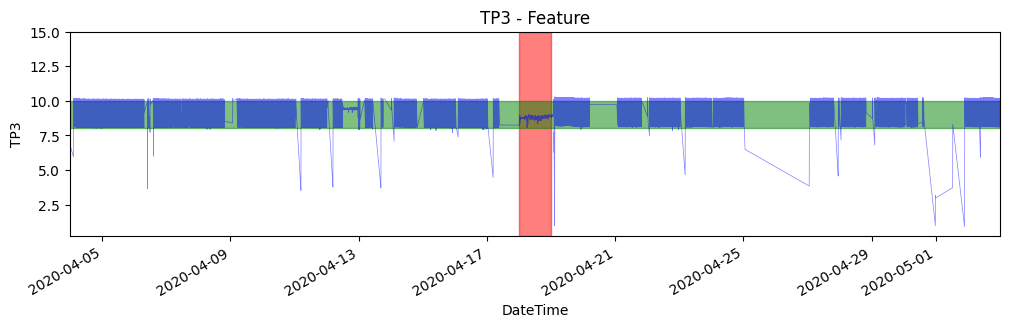

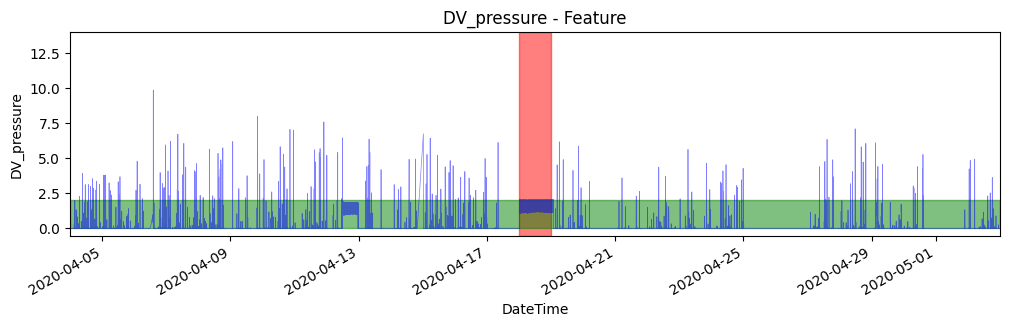

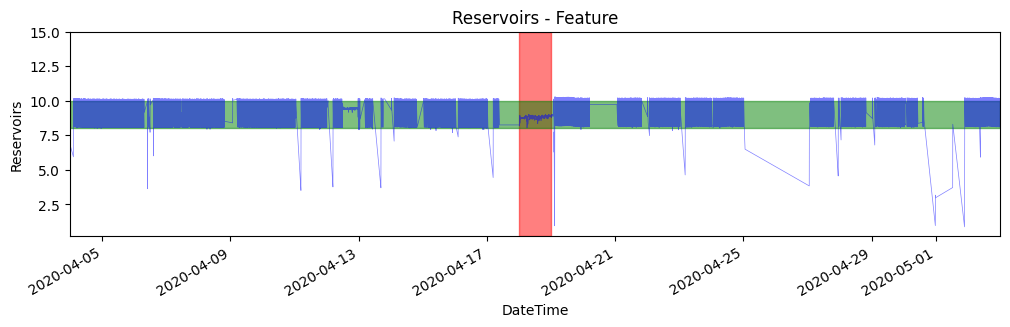

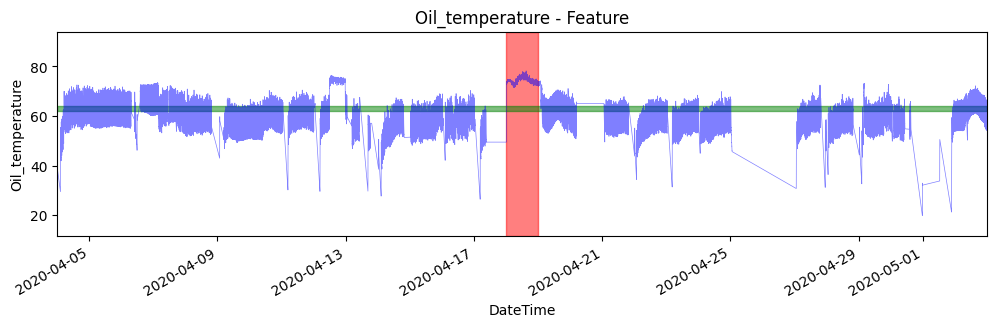

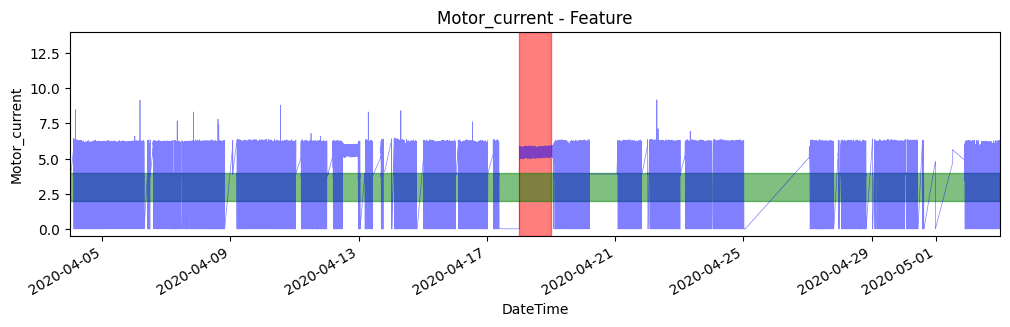

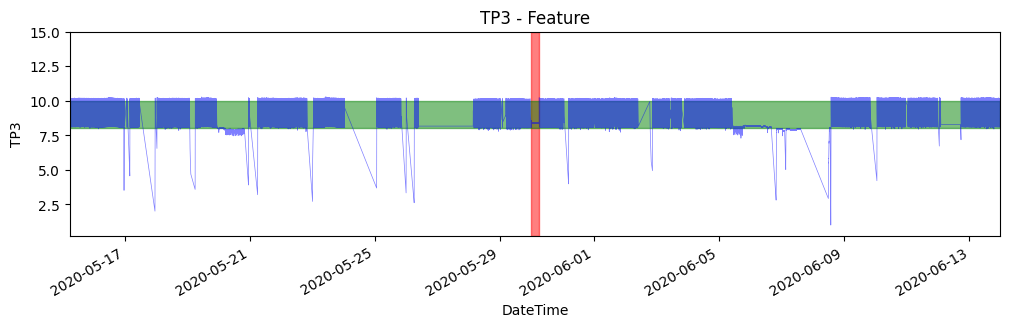

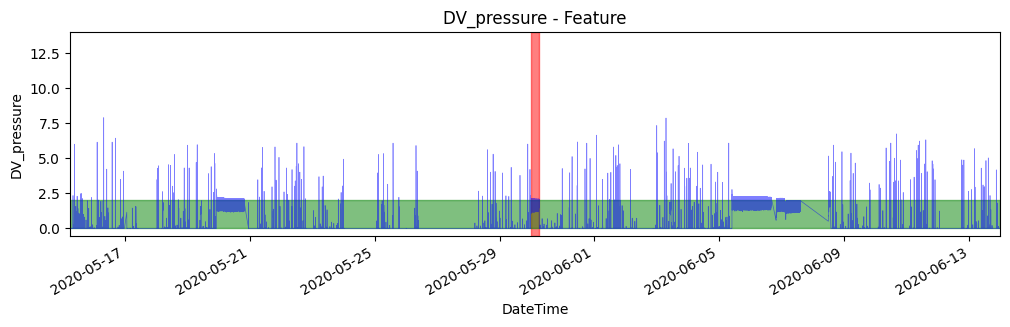

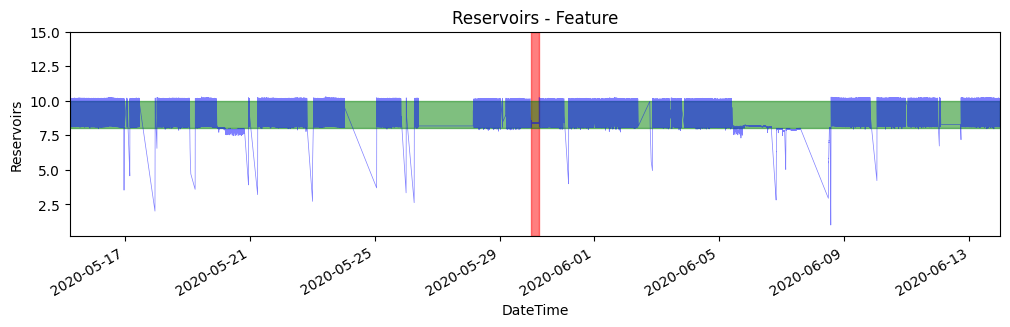

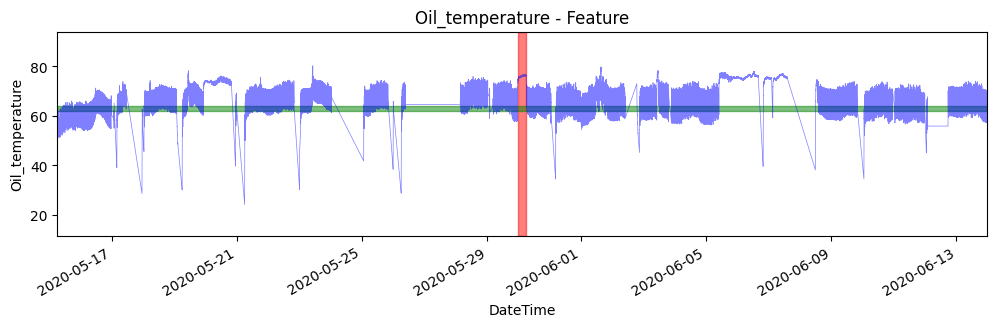

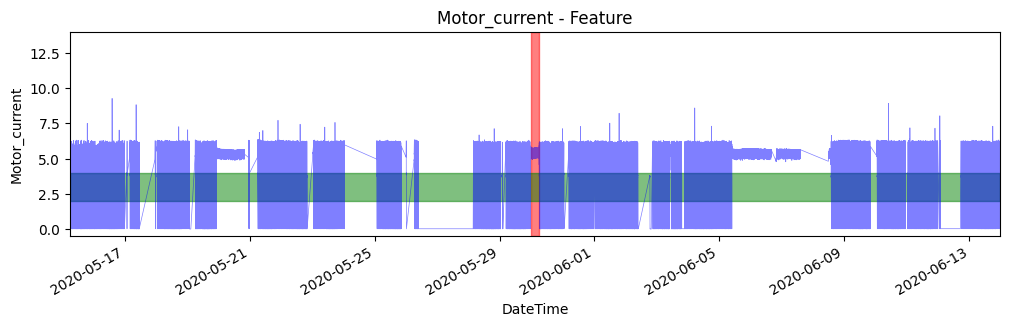

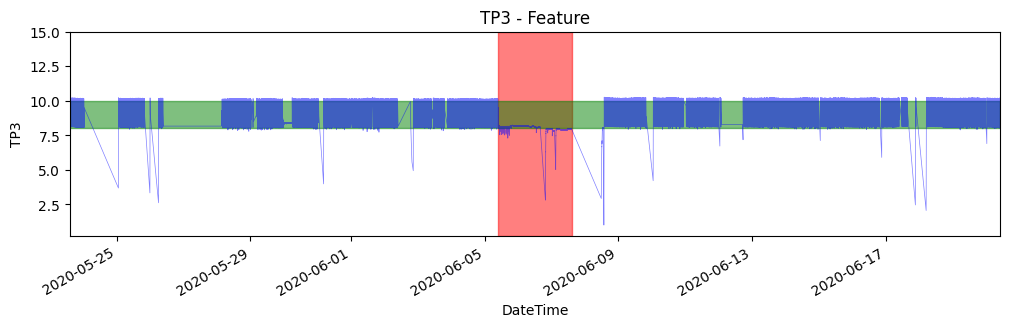

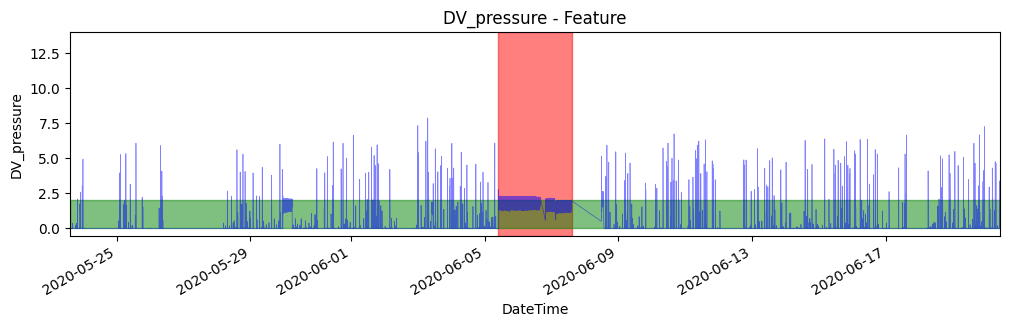

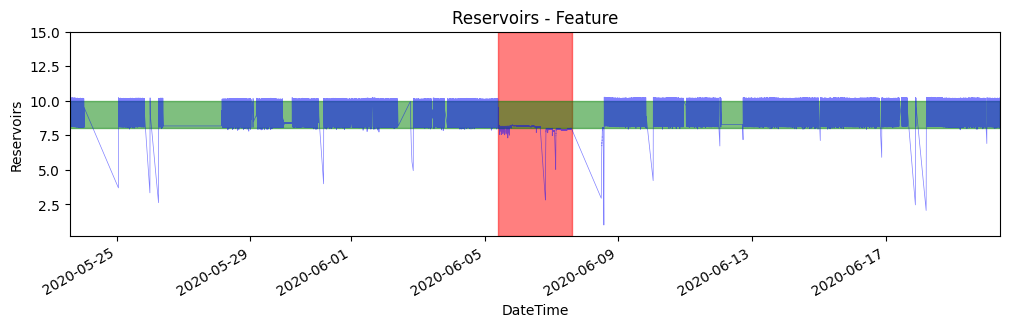

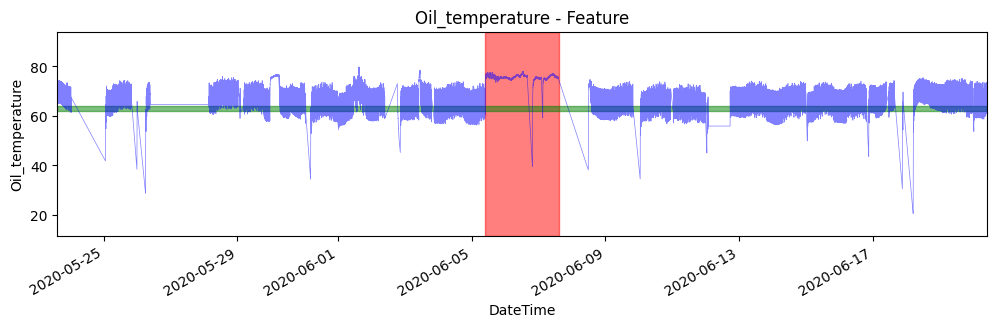

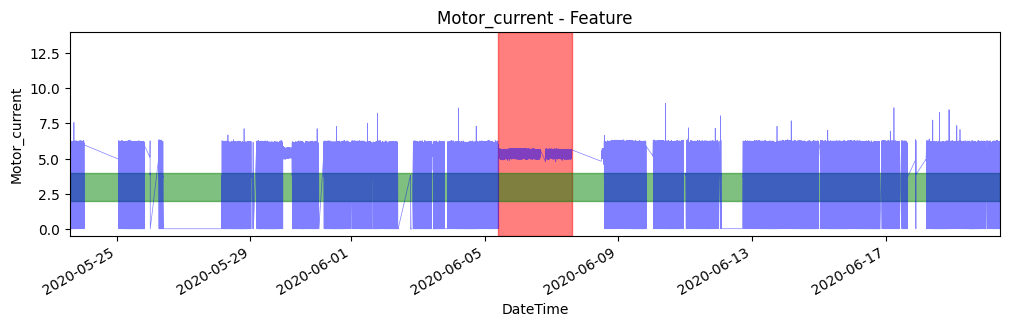

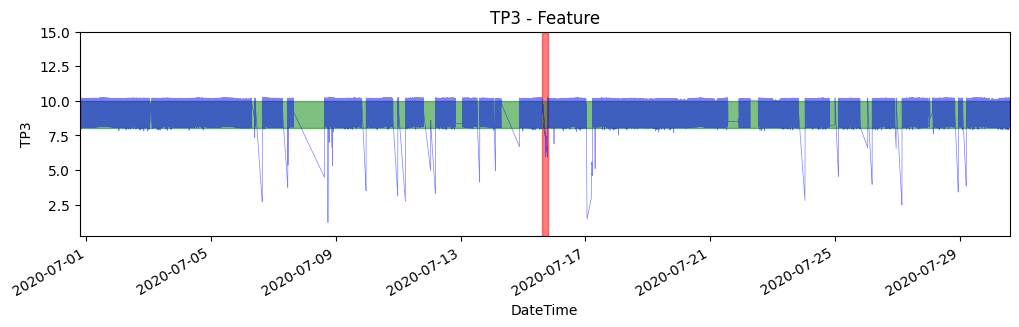

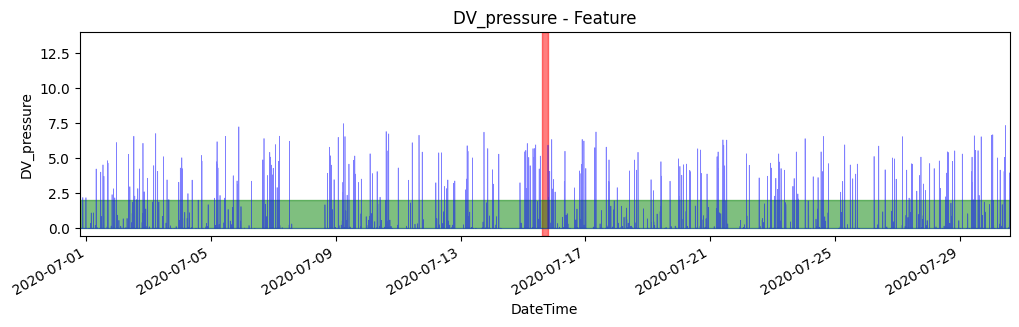

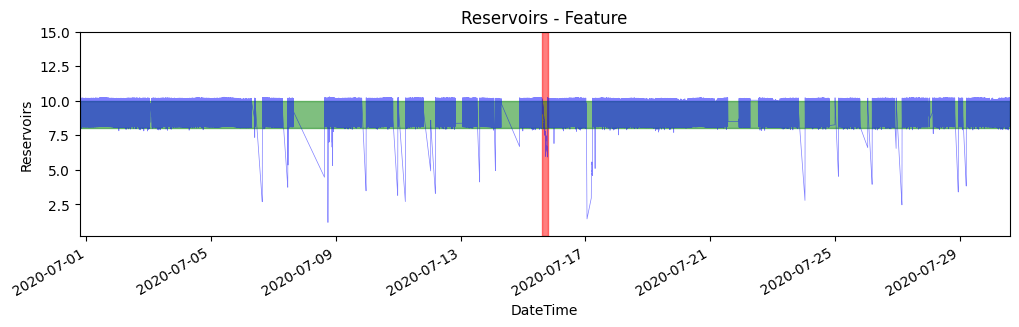

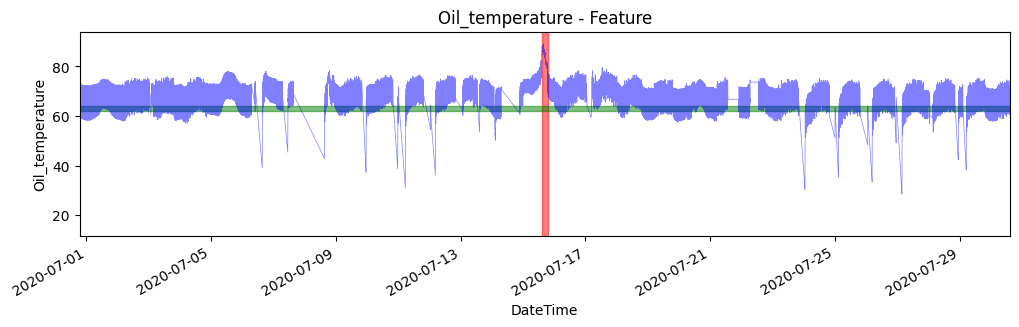

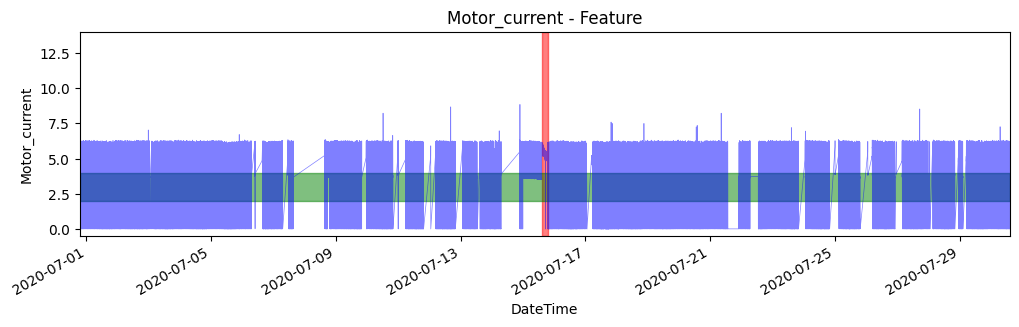

In [23]:

# visualization with markers during the month of a failure:
for start,end in Air_Leak_dates:
    for c in df02_sub[df02_sub.columns[range(len(df02_sub.columns))]]:
        ax = df02_sub[c].plot(figsize=(12,3),color='b',fontsize=10,linewidth=0.5,alpha=0.5)
        ax.set_title(f'{c} - Feature')
        ax.set_xlabel('DateTime')
        ax.set_ylabel(c)
        ax.set_xlim(xmax=datetime.strptime(start, '%Y-%m-%d %H:%M:%S') + timedelta(days=15),
                    xmin=datetime.strptime(end, '%Y-%m-%d %H:%M:%S') - timedelta(days=15))
        ax.set_ylim(ymax=(int(df02_sub[c].max())+5))
        
        ax.axvspan(start,end, color='r', alpha=0.5)
        ax.axhspan(int(df02_sub[c].mean()),(int(df02_sub[c].mean())+2), color='g',alpha=0.5)
        
        plt.show()


In [24]:
df02_sub

,TP3,DV_pressure,Reservoirs,Oil_temperature,Motor_current
timestamp,,,,,
2020-02-01 00:00:00,9.358,-0.024,9.358,53.600,0.0400
2020-02-01 00:00:10,9.348,-0.022,9.348,53.675,0.0400
2020-02-01 00:00:19,9.338,-0.022,9.338,53.600,0.0425
2020-02-01 00:00:29,9.328,-0.022,9.328,53.425,0.0400
2020-02-01 00:00:39,9.318,-0.022,9.318,53.475,0.0400
...,...,...,...,...,...
2020-09-01 03:59:10,8.918,-0.022,8.918,59.675,0.0425
2020-09-01 03:59:20,8.904,-0.020,8.904,59.600,0.0450
2020-09-01 03:59:30,8.890,-0.022,8.892,59.600,0.0425


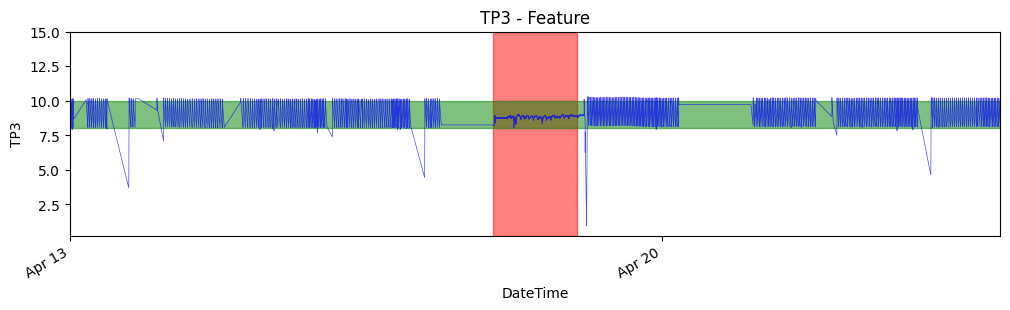

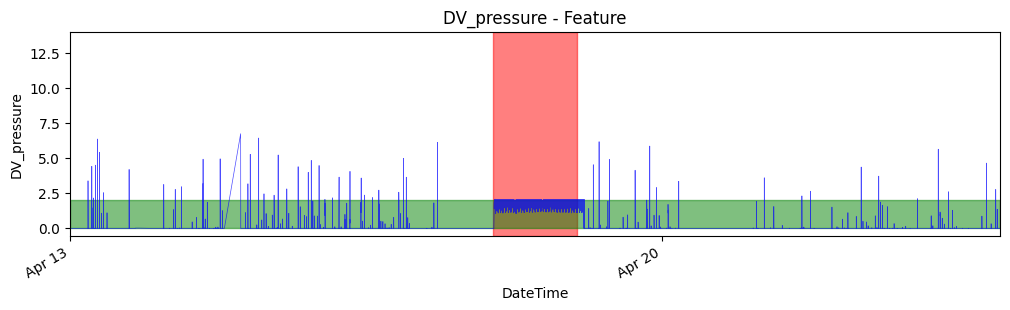

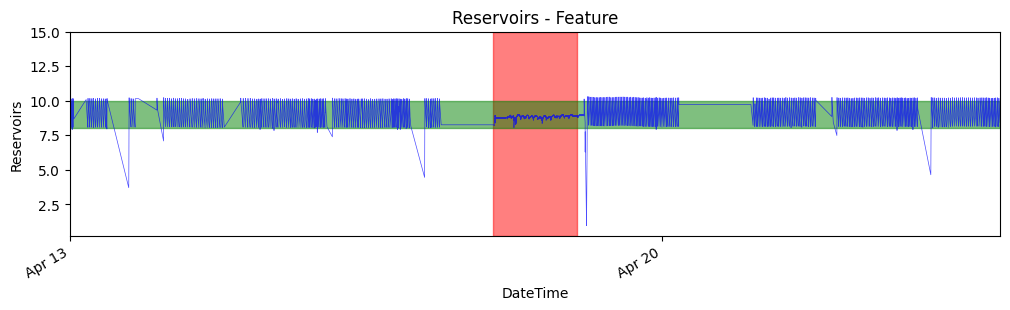

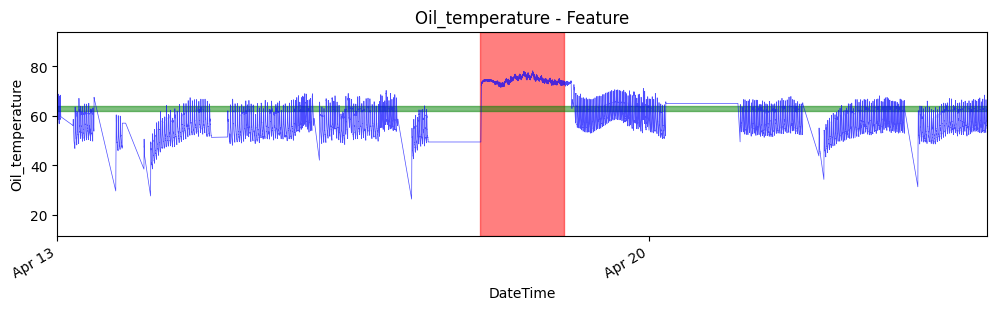

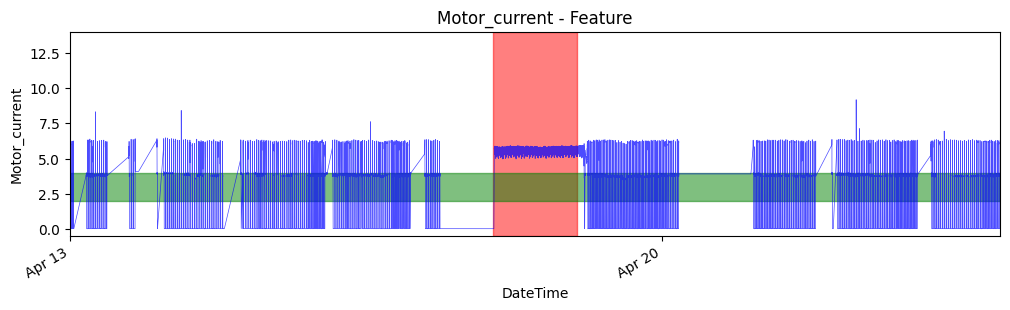

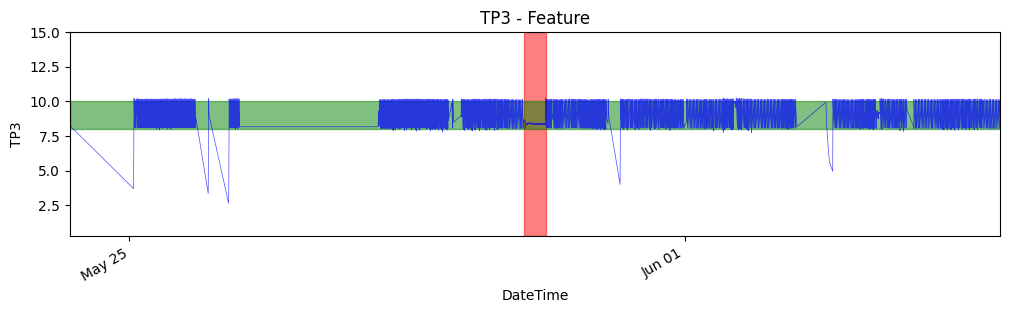

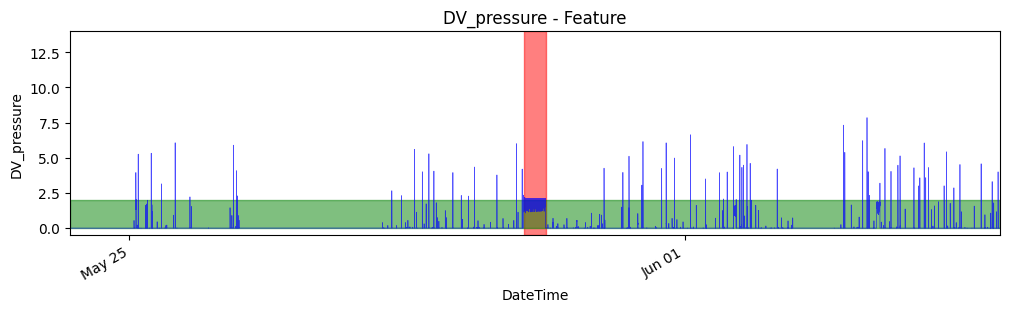

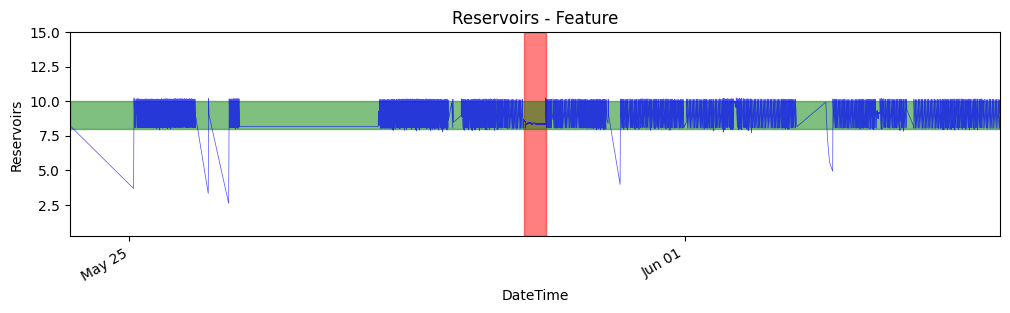

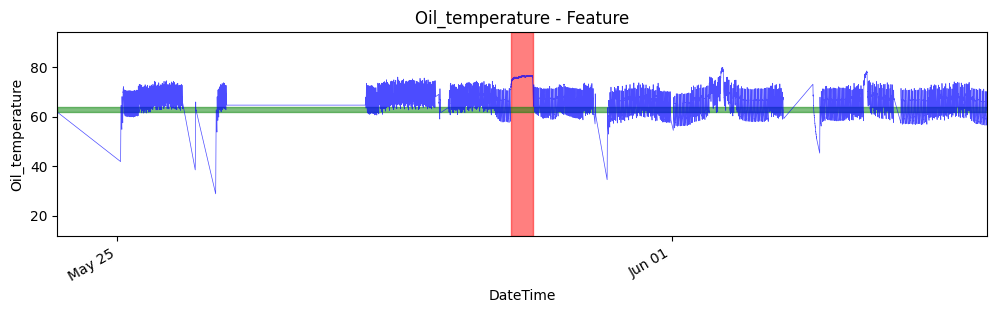

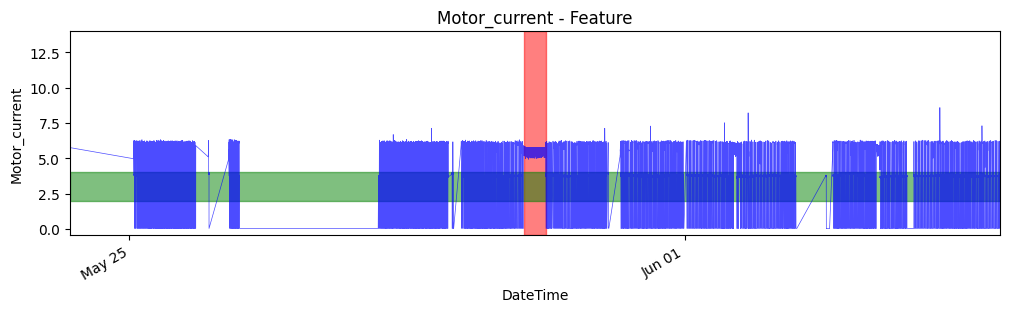

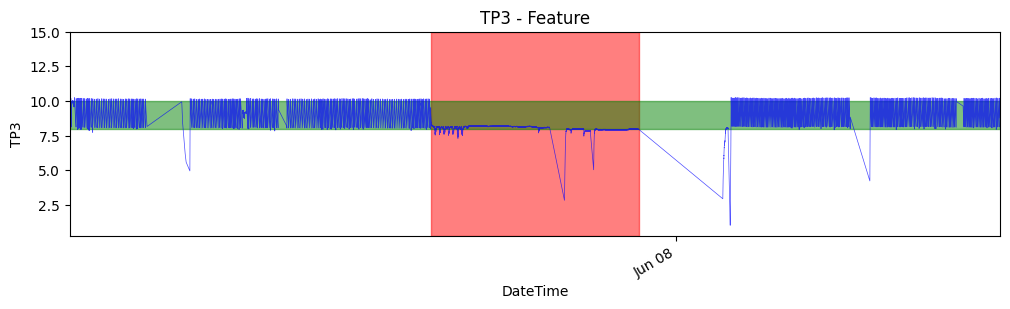

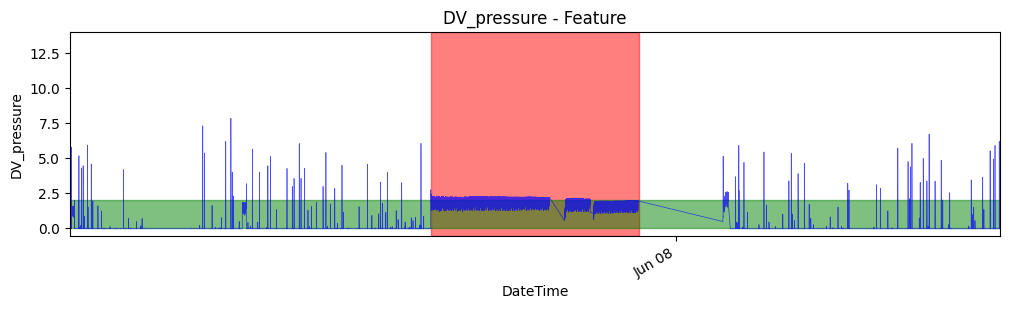

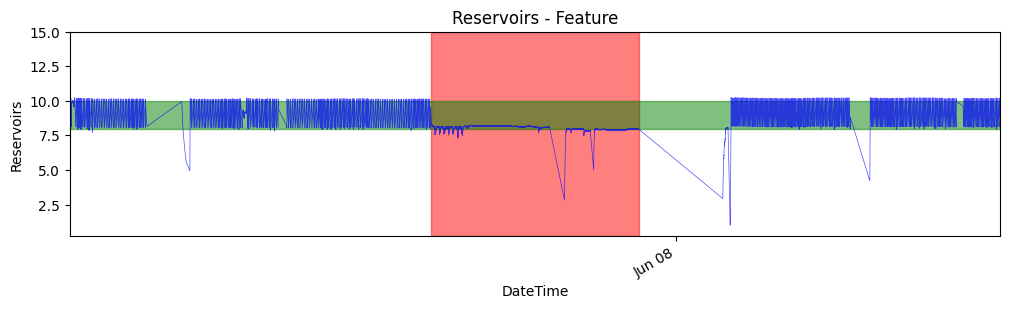

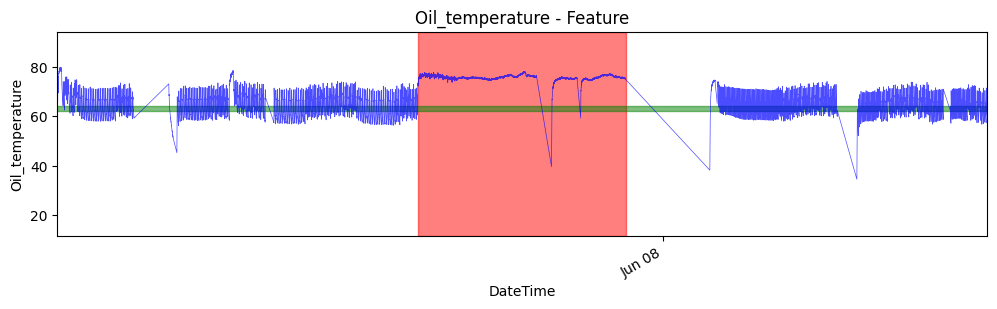

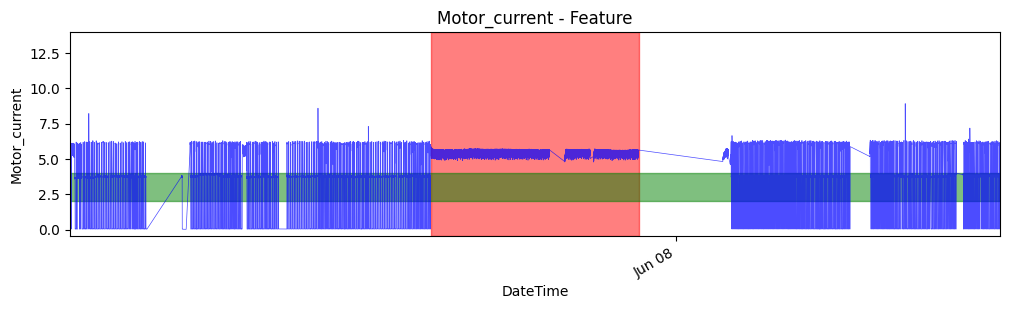

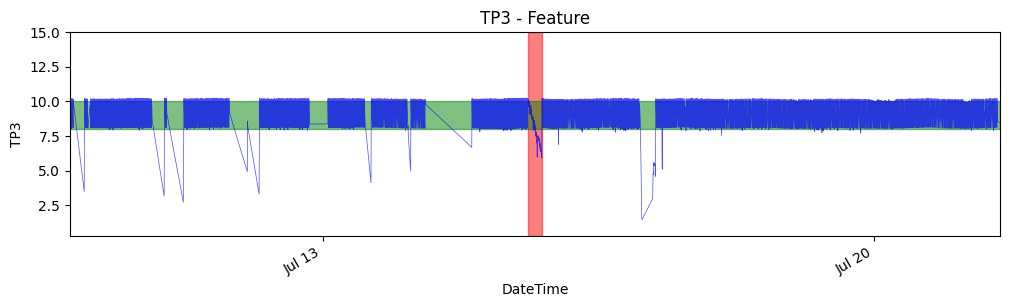

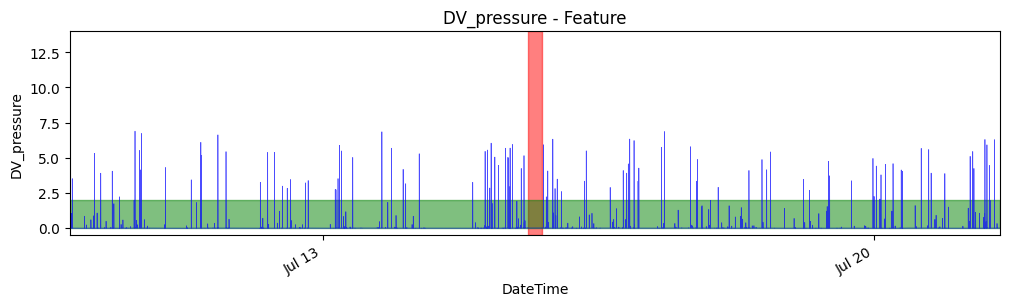

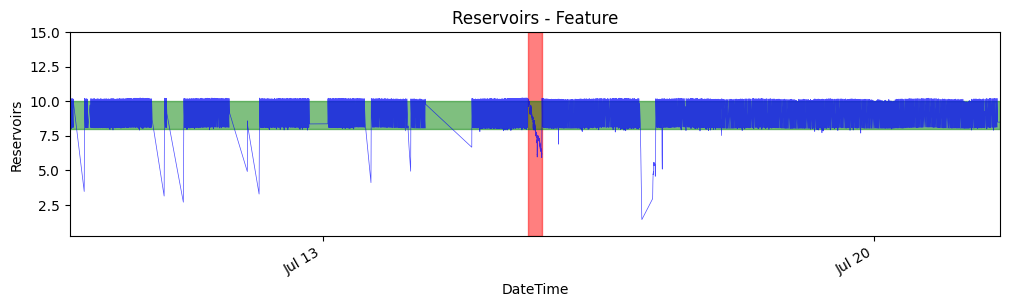

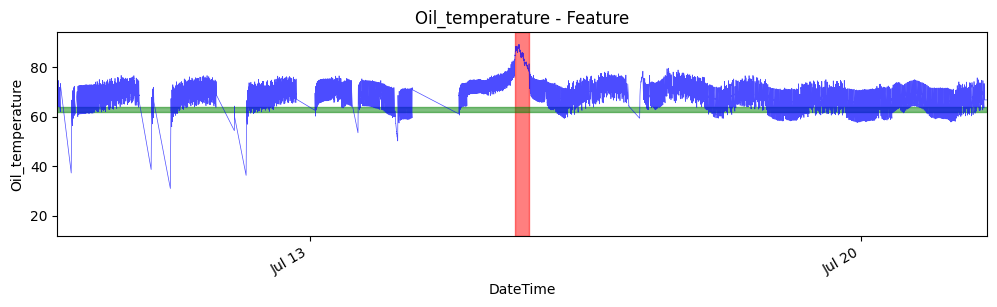

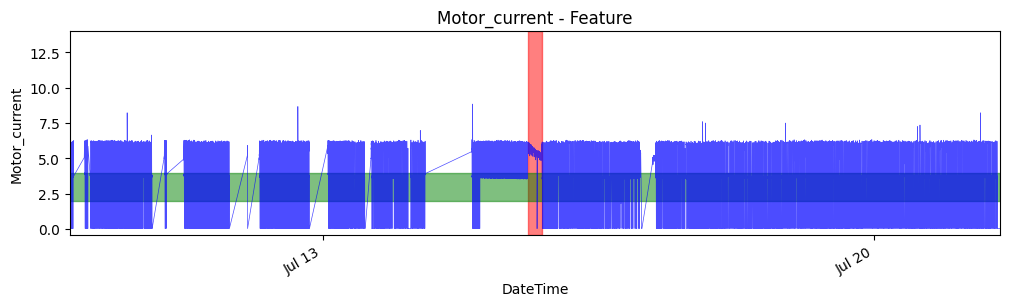

In [25]:

# visualization with markers during the week of a failure:
for start,end in Air_Leak_dates:
    for c in df02_sub[df02_sub.columns[range(len(df02_sub.columns))]]:
        ax = df02_sub[c].plot(figsize=(12,3),color='b',fontsize=10,linewidth=0.5,alpha=0.7)
        ax.set_title(f'{c} - Feature')
        ax.set_xlabel('DateTime')
        ax.set_ylabel(c)
        ax.set_xlim(xmax=datetime.strptime(start, '%Y-%m-%d %H:%M:%S') + timedelta(days=6),
                    xmin=datetime.strptime(end, '%Y-%m-%d %H:%M:%S') - timedelta(days=6))
        ax.set_ylim(ymax=(int(df02_sub[c].max())+5))
        
        ax.axvspan(start,end, color='r', alpha=0.5)
        ax.axhspan(int(df02_sub[c].mean()),(int(df02_sub[c].mean())+2), color='g',alpha=0.5)

        ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
        
        plt.show()


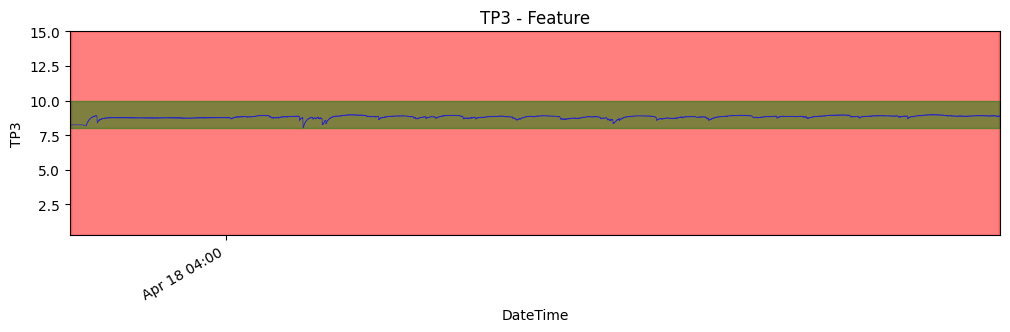

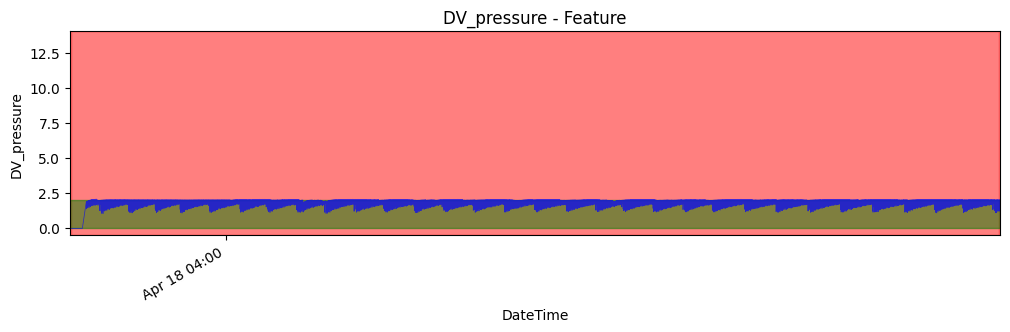

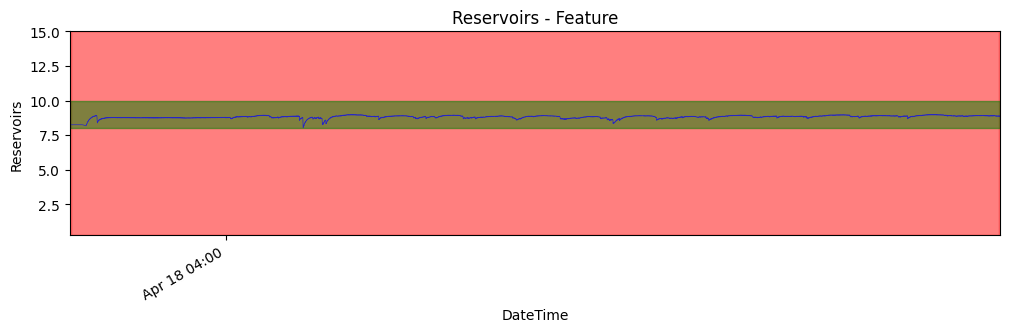

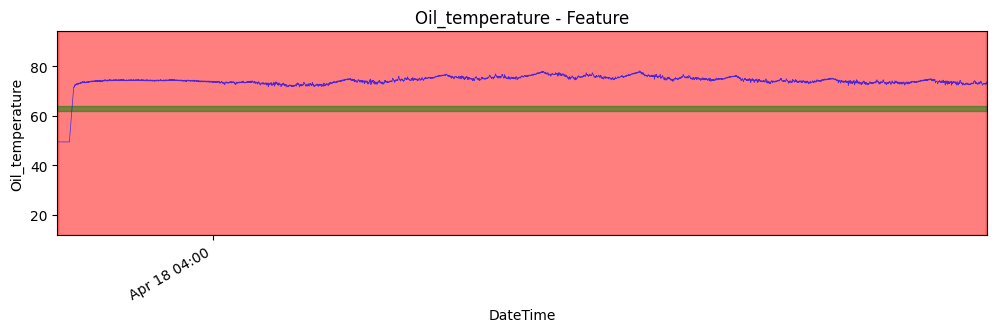

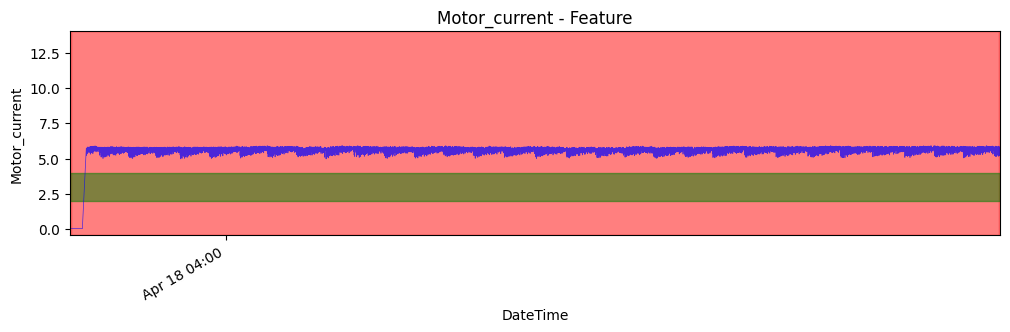

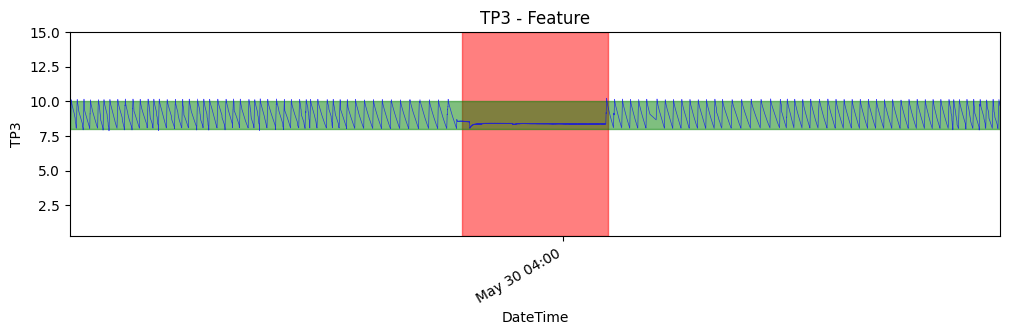

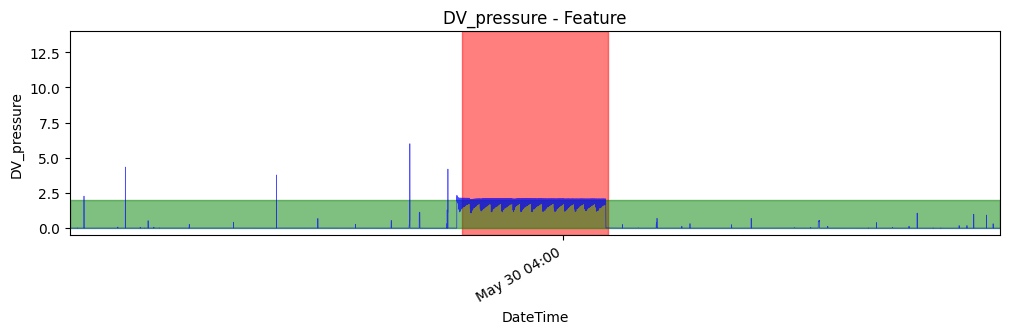

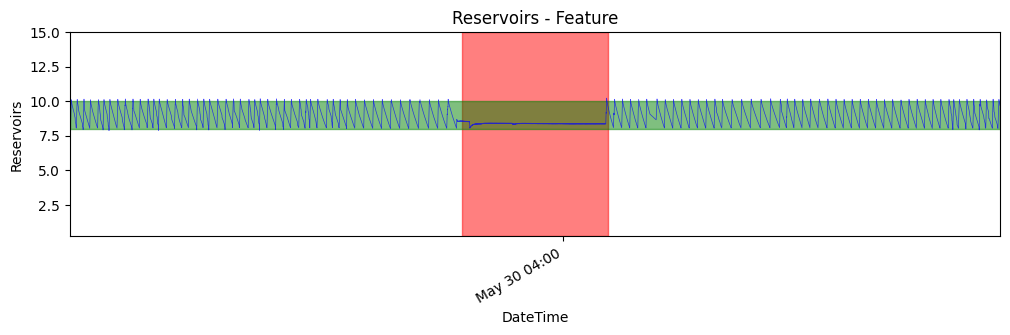

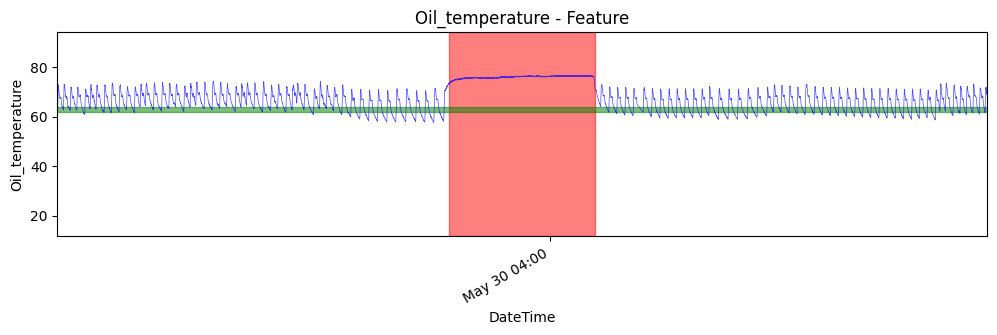

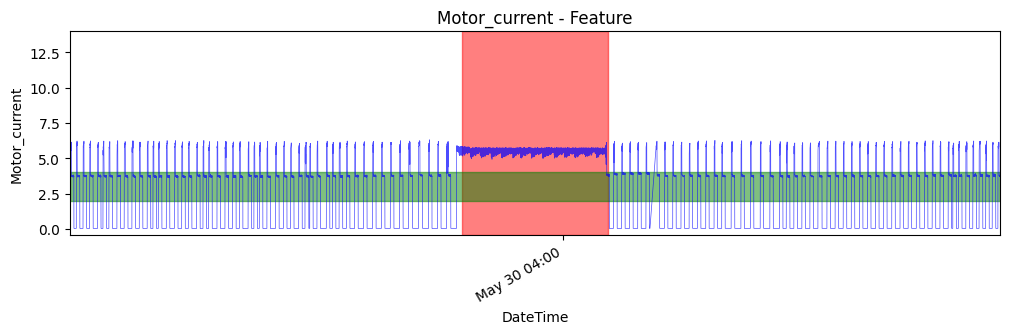

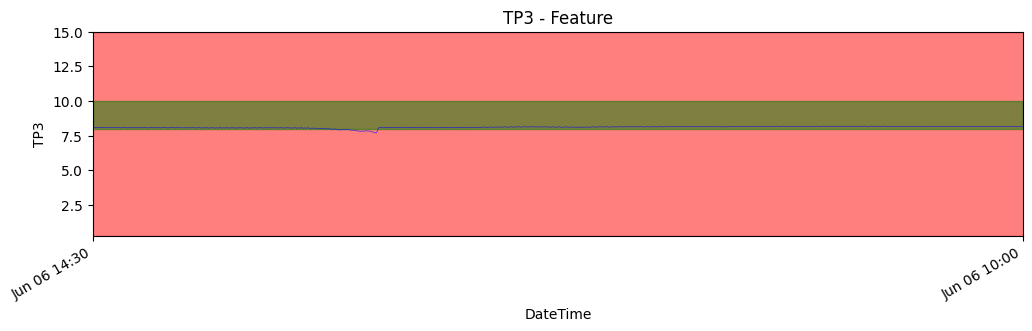

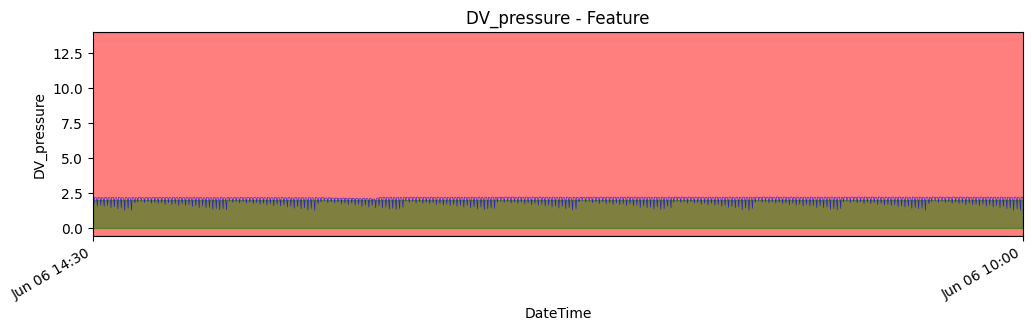

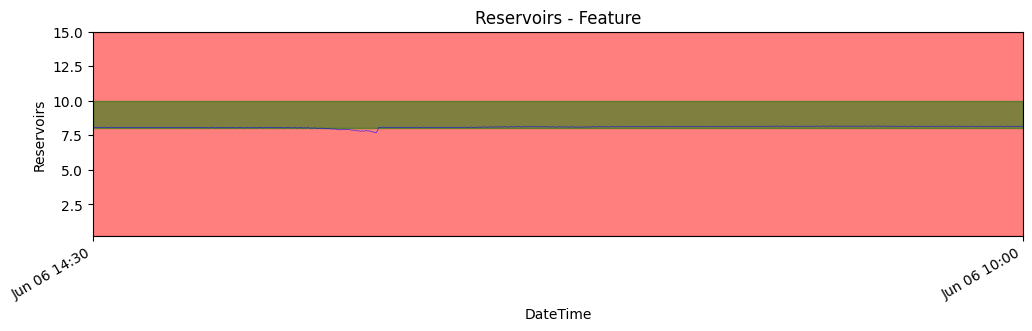

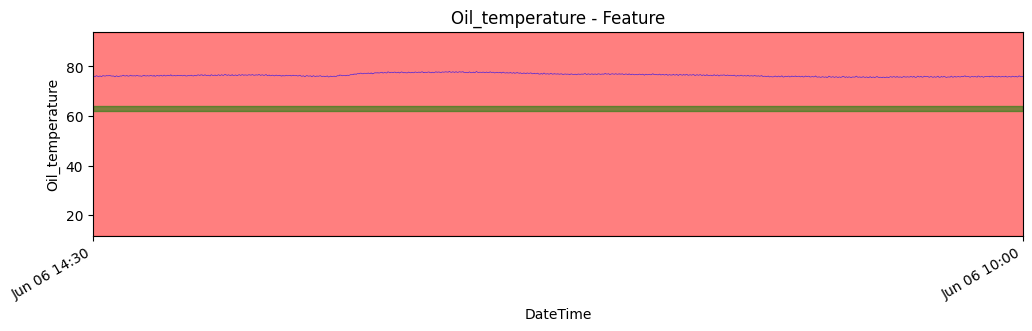

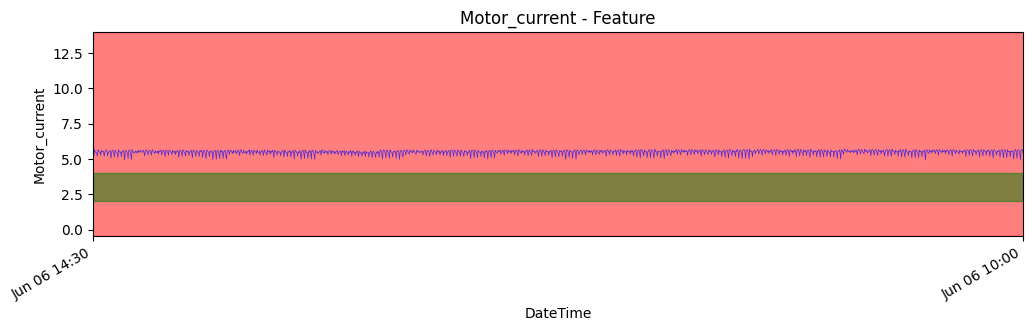

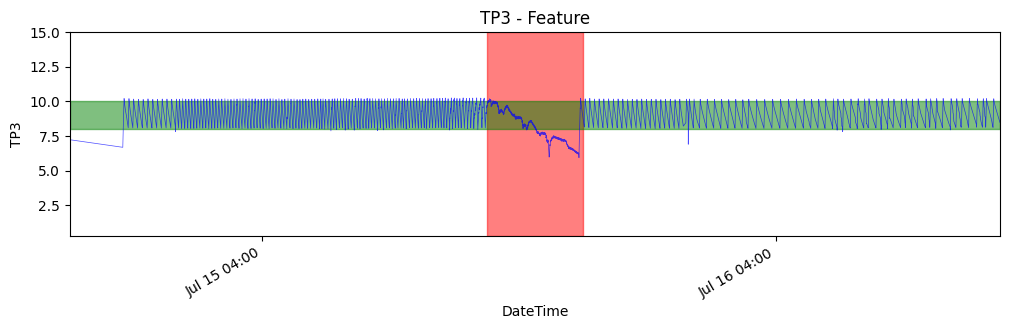

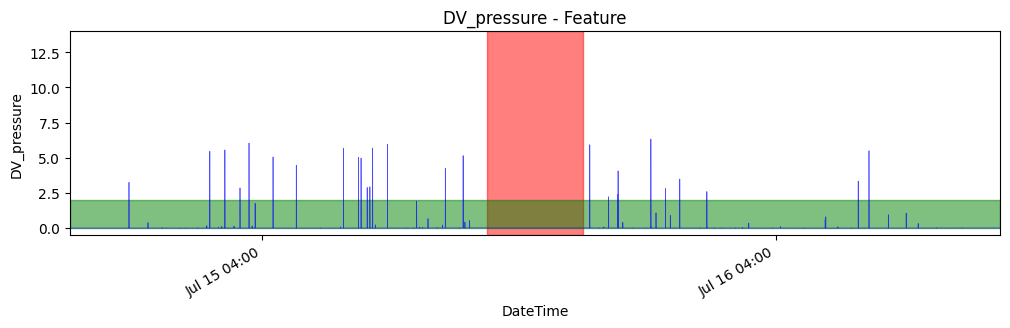

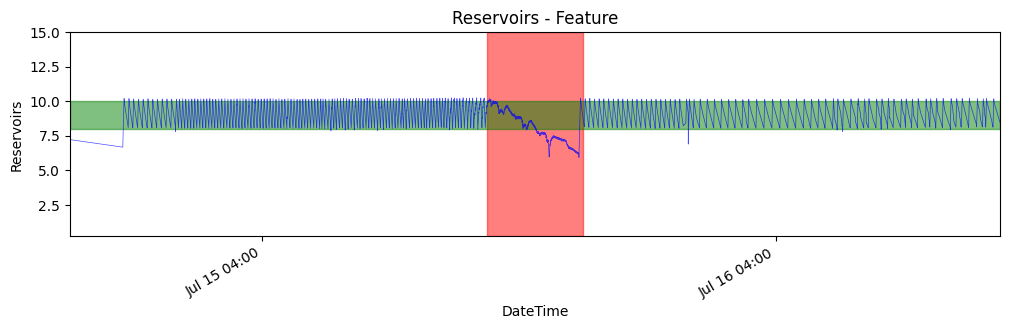

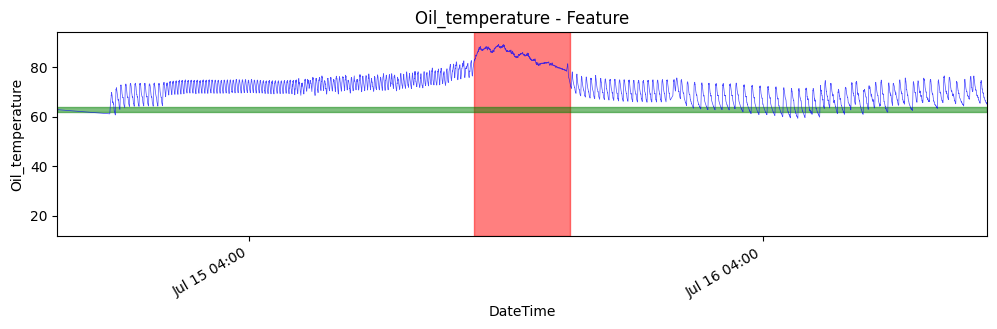

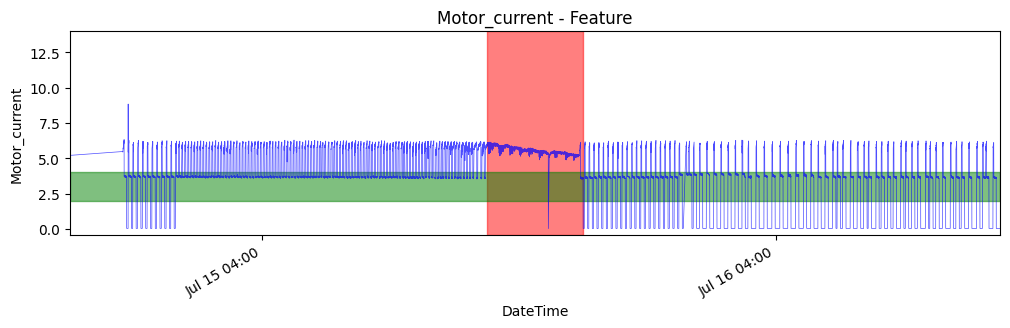

In [26]:

# visualization with markers during the day of a failure:
for start,end in Air_Leak_dates:
    for c in df02_sub[df02_sub.columns[range(len(df02_sub.columns))]]:
        ax = df02_sub[c].plot(figsize=(12,3),color='b',fontsize=10,linewidth=0.5,alpha=0.7)
        ax.set_title(f'{c} - Feature')
        ax.set_xlabel('DateTime')
        ax.set_ylabel(c)
        ax.set_xlim(xmax=datetime.strptime(start, '%Y-%m-%d %H:%M:%S') + timedelta(days=1),
                    xmin=datetime.strptime(end, '%Y-%m-%d %H:%M:%S') - timedelta(days=1))
        ax.set_ylim(ymax=(int(df02_sub[c].max())+5))
        
        ax.axvspan(start,end, color='r', alpha=0.5)
        ax.axhspan(int(df02_sub[c].mean()),(int(df02_sub[c].mean())+2), color='g',alpha=0.5)

        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=mdates.HOURLY))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %H:%M'))
        
        plt.show()

